# Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [ ]:
%pip install numpy
%pip install matplotlib

In [3]:
import numpy as np

def normalizacion(ket):
    """ Normalizar un vector ket."""
    norm = np.linalg.norm(ket)
    return ket / norm if norm != 0 else ket

def probabilidad(ket, position):
    """ Calcula la probabilidad de encontrar la partícula en una posición dada."""
    return abs(ket[position])**2

def probabilidad_transicion(ket1, ket2):
    """ Calcula la probabilidad de transición entre dos vectores ket usando su amplitud de transicion."""
    ket1 = normalizacion(ket1)
    ket2 = normalizacion(ket2)
    productointerno = np.vdot(ket1, ket2)
    return abs(productointerno)**2
def main():
    n = 5  
    ket1 = np.array([1, 1, 0, 0, 0], dtype=complex)
    ket2 = np.array([0, 1, 1, 0, 0], dtype=complex)

    ket1 = normalizacion(ket1)
    ket2 = normalizacion(ket2)

    print("Estado 1 normalizado: \n", ket1)
    print("Estado 2 normalizado:\n", ket2)
    print("Probabilidad de encontrar la partícula en x1:\n", probabilidad(ket1, 1))
    print("Probabilidad de transición de ket1 a ket2:\n", probabilidad_transicion(ket1, ket2))
main()


Estado 1 normalizado: 
 [0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j
 0.        +0.j]
Estado 2 normalizado:
 [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j
 0.        +0.j]
Probabilidad de encontrar la partícula en x1:
 0.4999999999999999
Probabilidad de transición de ket1 a ket2:
 0.2500000000000001


# Complete los retos de programación del capítulo 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [ ]:


## ejercicio 1
import numpy as np

def normalizacion(ket):
    """ Normalizar un vector"""
    norm = np.linalg.norm(ket)
    return ket / norm if norm != 0 else ket

def probabilidad(ket1, ket2):
    """probabilidad de transicion de vector 1 a vector 2"""
    inner_product = np.dot(bra(ket2), ket1)
    probability = np.abs(inner_product)**2
    return probability

def bra(ket):
    "conjugado transpuesto"
    return np.conjugate(ket.T)
def main():
    print("ingrese los vectores")
    v1= list(map(int,input("vector").split()))
    v2= list(map(int,input("vector").split()))
    ket1 = np.array(v1, dtype=complex)
    ket2 = np.array(v2, dtype=complex)
    ket1 = normalizacion(ket1)
    ket2 = normalizacion(ket2)
    print("Probabilidad de transición de ket1 a ket2:", probabilidad(ket1, ket2))
main()

In [ ]:
##ejercicio 2

import numpy as np

def es_hermitiana(matrix):
    return np.allclose(matrix, np.conjugate(matrix.T))

def media(matrix, ket):
    bra = np.conjugate(ket.T)
    return np.real(np.dot(bra, np.dot(matrix, ket)))

def varianza(matrix, ket):
    mean = media(matrix, ket)
    identidad = np.eye(matrix.shape[0])
    delta = matrix - mean * identidad
    var = media(np.dot(delta, delta), ket)
    return var

def main():
    print("Ingrese la matriz")
    rows = int(input("Número de filas/columnas: "))
    matriz = []
    for i in range(rows):
        fila = list(map(complex, input(f"Fila").split()))
        matriz.append(fila)
    matriz = np.array(matriz)

    print("Ingrese el vector ket.")
    ket = list(map(complex, input().split()))
    ket = np.array(ket, dtype=complex)

    print("\nMatriz observable:")
    print(matriz)
    print("Ket:", ket)

    if es_hermitiana(matriz):
        print("La matriz es hermitiana.")
        media = media(matriz, ket)
        varianza = varianza(matriz, ket)
        print(f"Media del observable: {media}")
        print(f"Varianza del observable: {varianza}")
    else:
        print("La matriz NO es hermitiana.")
main()

Ingrese la matriz (fila por fila, separados por espacios.


In [ ]:
#Ejercicio 3
import numpy as np

def vPropios_probabilidad(matrix, ket):
    valoresPropios, vectoresPropios = np.linalg.eigh(matrix)  # Función para matrices hermitianas
    probabilidades = []
    for vector in vectoresPropios.T:
        amp = np.dot(np.conjugate(vector.T), ket)
        prob = np.abs(amp)**2
        probabilidades.append(prob)
    return valoresPropios, probabilidades
def main():
    print("Ingrese la matriz del observable")
    rows = int(input("Número de filas/columnas: "))
    observable = []
    for i in range(rows):
        fila = list(map(complex, input(f"Fila").split()))
        observable.append(fila)
    observable = np.array(observable)

    print("Ingrese el vector ket (ejemplo: 1 0):")
    ket = list(map(complex, input().split()))
    ket = np.array(ket, dtype=complex)

    valoresPropios, probs = vPropios_probabilidad(observable, ket)
    print("\nValores propios del observable:", valoresPropios)
    print("Probabilidades de transitar a cada vector propio:")
    for i, p in enumerate(probs):
        print(f"  Autovector {i+1}: {p}")

main()

In [ ]:
#Ejercio 4

import numpy as np

def esUnitaria(U):
    identidad = np.eye(U.shape[0])
    return np.allclose(np.dot(np.conjugate(U.T), U), identidad)

def proximoEstado(U, ket):
    return np.dot(U, ket)

def main():
    print("Ingrese la matriz unitaria (fila por fila, separados por espacios")
    rows = int(input("Número de filas/columnas: "))
    U = []
    for i in range(rows):
        fila = list(map(complex, input(f"Fila").split()))
        U.append(fila)
    U = np.array(U)

    print("Ingrese el vector ket inicial")
    ket = list(map(complex, input().split()))
    ket = np.array(ket, dtype=complex)

    if esUnitaria(U):
        print("La matriz es unitaria.")
        final_state = proximoEstado(U, ket)
        print("Estado final:", final_state)
    else:
        print("La matriz NO es unitaria.")
main()


# Realice los siguientes problemas e incluyalos como ejemplos
Modele en su librería los problemas
4.3.1
4.3.2
4.4.1
4.4.2
Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3

4.3.1 Find all the possible states the system described in Exercise 4.2.2 can transition into afeter a measurement has been carried out.


In [1]:
import numpy as np

Sx = (1/2) * np.array([[0, 1], [1, 0]])
valores_propios, vectores_propios = np.linalg.eig(Sx)

# Mostrar resultados
print("Valores propios:")
print(valores_propios)

print("\nVectores propios:")
print(vectores_propios)


Valores propios:
[ 0.5 -0.5]

Vectores propios:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Ejercicio 4.3.2 basado en 4.3.1


Probabilidades de transición:
Estado propio 1: 0.5000
Estado propio 2: 0.5000


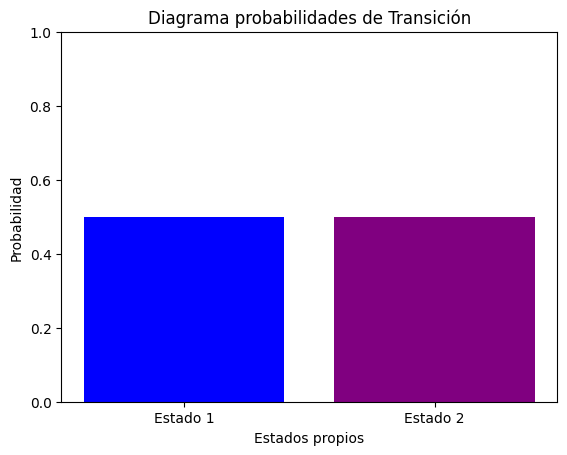

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Sx = (1/2) * np.array([[0, 1], [1, 0]])

valores_propios, vectores_propios = np.linalg.eig(Sx)

psi = np.array([1, 0])  
probabilidades = []
for vi in vectores_propios.T: 
    amplitud_transicion = np.dot(np.conjugate(vi), psi) 
    probabilidad = np.abs(amplitud_transicion) ** 2  
    probabilidades.append(probabilidad)


print("\nProbabilidades de transición:")
for i, p in enumerate(probabilidades):
    print(f"Estado propio {i+1}: {p:.4f}")

estados = [f"Estado {i+1}" for i in range(len(probabilidades))]
plt.bar(estados, probabilidades, color=['blue', 'purple'])
plt.xlabel("Estados propios")
plt.ylabel("Probabilidad")
plt.title("Diagrama probabilidades de Transición")
plt.ylim(0, 1)
plt.show()


ejercicio 4.41

In [9]:
import numpy as np


U1 = np.array([[0, 1], [1, 0]])
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])


U1_conj_T = np.conjugate(U1).T
U2_conj_T = np.conjugate(U2).T

print("Ejercicio 4.41")
print("U1 * U1^†:")
print(np.dot(U1, U1_conj_T))
print("U2 * U2^†:")
print(np.dot(U2, U2_conj_T))


U = np.dot(U1, U2)
print("\nMatriz U = U1 * U2:")
print(U)

U_conj_T = np.conjugate(U).T
print("\nU * U^†:")
print(np.dot(U, U_conj_T))


Ejercicio 4.41
U1 * U1^†:
[[1 0]
 [0 1]]
U2 * U2^†:
[[1.00000000e+00 4.26642159e-17]
 [4.26642159e-17 1.00000000e+00]]

Matriz U = U1 * U2:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

U * U^†:
[[1.00000000e+00 4.26642159e-17]
 [4.26642159e-17 1.00000000e+00]]


ejercicio 4.42

In [ ]:
psi = np.array([1, 0, 0, 0])

U= np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2),0],
    [1j/np.sqrt(2),0,0,-1/np.sqrt(2)],
    [ 1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0,  1/np.sqrt(2), -1/np.sqrt(2), 0]
])

estado1 = np.dot(U, psi)

print("Estado 1\n",estado1)

estado2= np.dot(U,estado1)
print("Estado final\n",estado2)

Estado 1
 [0.        +0.j         0.        +0.70710678j 0.70710678+0.j
 0.        +0.j        ]
Estado final
 [ 0.5+0.5j  0. +0.j   0. +0.j  -0.5+0.5j]


# Ejercicio 4.5.2: Estado Cuántico de Partículas con Spin

## Sistema de 2 partículas con spin
Para dos partículas con spin -½, el estado general es:
```math
|\psi\rangle = a|\uparrow\uparrow\rangle + b|\uparrow\downarrow\rangle + c|\downarrow\uparrow\rangle + d|\downarrow\downarrow\rangle
```
donde a,b,c y d son cosntantes complejas  y la base son las combinaciones de up y down.

Para n particulas con spin:
```math
|\psi\rangle = \sum_{k=0}^{2^n-1} c_k |k\rangle
```
donde cada estado |k> representa una combinación de spins y ck representa una constante compleja para este estado k.


# Ejercicio 4.5.3: Separabilidad de Estados Cuánticos

El estado dado es:
```math
|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle
```
Definición: Un estado es separable si puede expresarse como:
```math
|\phi\rangle = (\text{estado partícula 1}) \otimes (\text{estado partícula 2})
Procedimiento:
```
Factorizamos el estado:
```math
|\phi\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle
```
Identificamos:

Partícula 1: |x₀⟩ + |x₁⟩ (superposición)

Partícula 2: |y₁⟩ (estado puro)

Conclusión: El estado es separable porque puede escribirse como el producto de dos estados individuales.